In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# to show all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

#### Frequent Value / Mode Imputation

- Assumption: Data is missing completely at random (MCAR) and The missing observations, most likely look like the majority of the observations in the variable (aka, the mode)

- **NOTE**: Imputation should be done over the training set, and then propagated to the test set. This means that the most frequent category has to be selected from the training set, and used to replace NA both in train and test sets.

In [3]:

# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [4]:
# let's inspect the percentage of missing values in each variable

data.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [26]:
# let's separate into training and testing set

x_train, x_test, y_train, y_test = train_test_split(
    data,
    data['SalePrice'], # target
    test_size=0.3, # percentage of observations in the test set
    random_state=0) # seed for reproducibility

x_train.shape, x_test.shape

((1022, 3), (438, 3))

In [27]:
# BsmtQual

# let's remind ourselves of the % of missing values
x_train['BsmtQual'].isnull().mean()

0.023483365949119372

Text(0, 0.5, 'Number of houses')

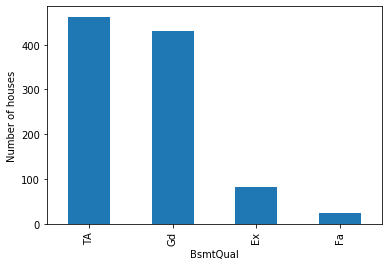

In [28]:
# let's inspect the number of observations per category in BsmtQual

# we used this line of code in section 3 on variable characteristics

# value_counts() counts the amount of houses that show each of the labels
# in the variable indicated below

x_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

In [29]:
# Let's find the most frequent category for BsmtQual

x_train['BsmtQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'BsmtQual')

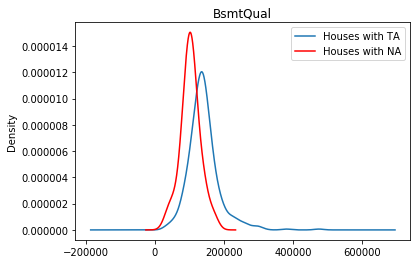

In [30]:
# let's plot the distribution of the target for the houses that:

# * show the most frequent category or
# * those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# select and plot houses with the most frequent label
x_train[x_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# select and plot houses with missing data in the variable
x_train[x_train['BsmtQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('BsmtQual')

In [31]:
# I keep the original distribution of SalePrice for the most
# frequent category for later

# the use of tmp is common to name temporal variables

tmp = x_train[x_train['BsmtQual']=='TA']['SalePrice']

In [32]:
# Let's fill na in both train and test
x_train['BsmtQual'] = x_train['BsmtQual'].fillna('TA')
x_test['BsmtQual'] = x_test['BsmtQual'].fillna('TA')

In [33]:
x_train['BsmtQual'].isnull().sum()

0

Text(0, 0.5, 'Number of houses')

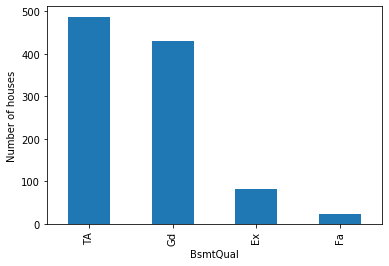

In [34]:
# evaluate effect on distribution of categories

x_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

Text(0.5, 1.0, 'BsmtQual')

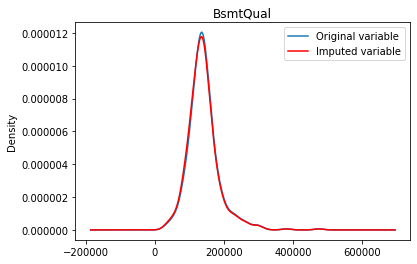

In [35]:
# did the distribution of SalePrice for the most frequent category change?
# let's have a look

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of salePrice for houses with most frequent label
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
x_train[x_train['BsmtQual'] == 'TA']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('BsmtQual')

In [38]:
# FireplaceQu

# let's remind ourselves of the % of missing values
x_train['FireplaceQu'].isnull().mean()

0.46771037181996084

Text(0, 0.5, 'Number of houses')

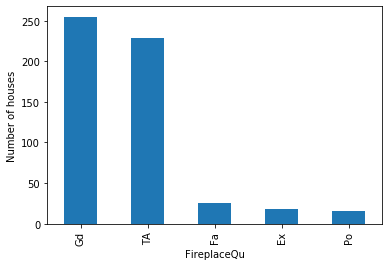

In [40]:
# let's inspect the number of observations per category

x_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

Text(0.5, 1.0, 'FirePlaceQu')

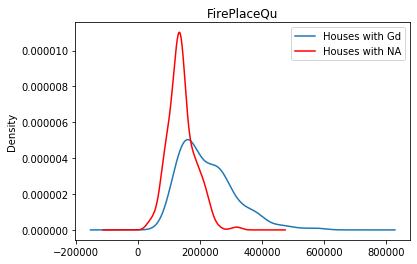

In [41]:
# let's plot the distribution of the target for the houses that
# show the most frequent category and those that show missing data

fig = plt.figure()
ax = fig.add_subplot(111)

# houses with the most frequent label for FirePlaceQu
x_train[x_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

# houses with missing data in FirePlaceQu
x_train[x_train['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

In [42]:
# keep the original distribution of SalePrice for houses
# that show Gd in FirePlaceQu, for later.

tmp = x_train[x_train['FireplaceQu']=='Gd']['SalePrice']

In [43]:
# Let's fill na in both train and test

x_train['FireplaceQu'] = x_train['FireplaceQu'].fillna('Gd')
x_test['FireplaceQu'] = x_test['FireplaceQu'].fillna('Gd')

Text(0, 0.5, 'Number of houses')

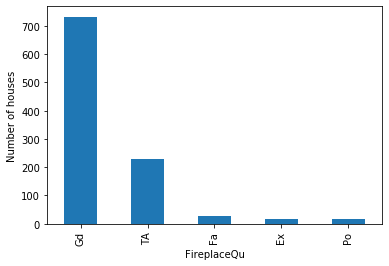

In [44]:
# let's inspect the number of observations per category

x_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

Text(0.5, 1.0, 'FirePlaceQu')

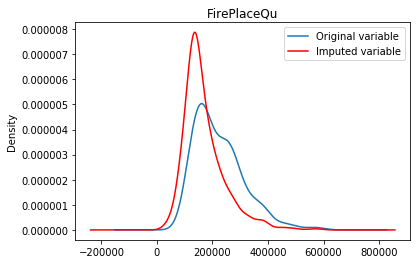

In [45]:
# let's plot the distribution of the target for the original variable
# fand the imputed variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution of the variable
# remember I captured this a few cells up in the notebook
tmp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
x_train[x_train['FireplaceQu'] == 'Gd']['SalePrice'].plot(
    kind='kde', ax=ax, color='red')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('FirePlaceQu')

#### Missing Category Imputation


When replacing NA in categorical variables by a label called 'Missing', we are not learning anything from the training set, so in principle we could do this in the original dataset and then separate into train and test. However, I do not recommend this practice. You will see in later notebooks that splitting into train and test right at the beginning helps with building a machine learning pipeline. So I will continue with this practice here as well.

In [52]:
# these are categorical columns and the target SalePrice
cols_to_use = ['BsmtQual', 'FireplaceQu', 'SalePrice']

data = pd.read_csv('data/housing.csv', usecols=cols_to_use)
data.head()

# let's separate into training and testing set

x_train, x_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0)

x_train.shape, x_test.shape

((1022, 3), (438, 3))

0.023483365949119372


Text(0, 0.5, 'Number of houses')

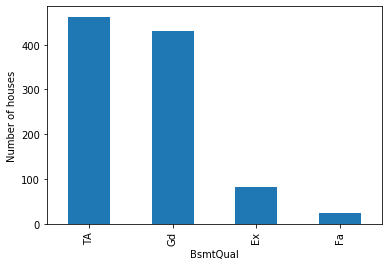

In [53]:
# BsmtQual

# let's remind ourselves of the % of missing values
print(x_train['BsmtQual'].isnull().mean())

x_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')


In [54]:
x_train['BsmtQual'] = x_train['BsmtQual'].fillna('Missing')
x_test['BsmtQual'] = x_test['BsmtQual'].fillna('Missing')

Text(0, 0.5, 'Number of houses')

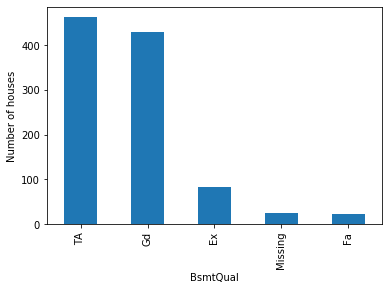

In [55]:
x_train['BsmtQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('BsmtQual')
plt.ylabel('Number of houses')

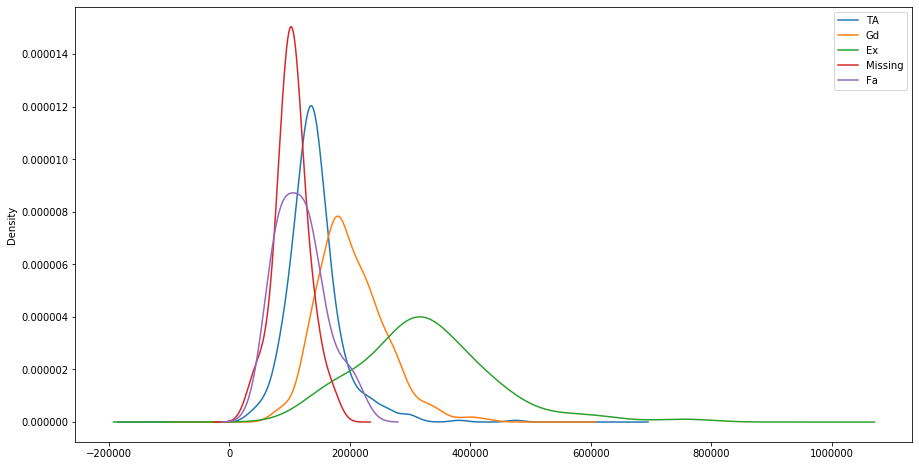

In [60]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

# a plot per category
x_train[x_train['BsmtQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['BsmtQual']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['BsmtQual']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['BsmtQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['BsmtQual']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['TA', 'Gd', 'Ex', 'Missing', 'Fa']
ax.legend(lines, labels, loc='best')

0.46771037181996084


Text(0, 0.5, 'Number of houses')

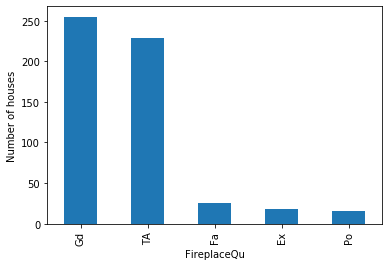

In [62]:
# FireplaceQu

# let's remind ourselves of the % of missing values
print(x_train['FireplaceQu'].isnull().mean())

x_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

Text(0, 0.5, 'Number of houses')

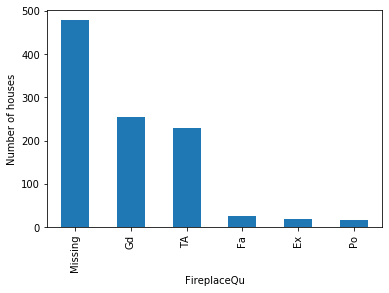

In [63]:
# Let's fill na in both train and test
x_train['FireplaceQu'] = x_train['FireplaceQu'].fillna('Missing')
x_test['FireplaceQu'] = x_test['FireplaceQu'].fillna('Missing')

# let's inspect the number of observations per category
# in the imputed variable

x_train['FireplaceQu'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('FireplaceQu')
plt.ylabel('Number of houses')

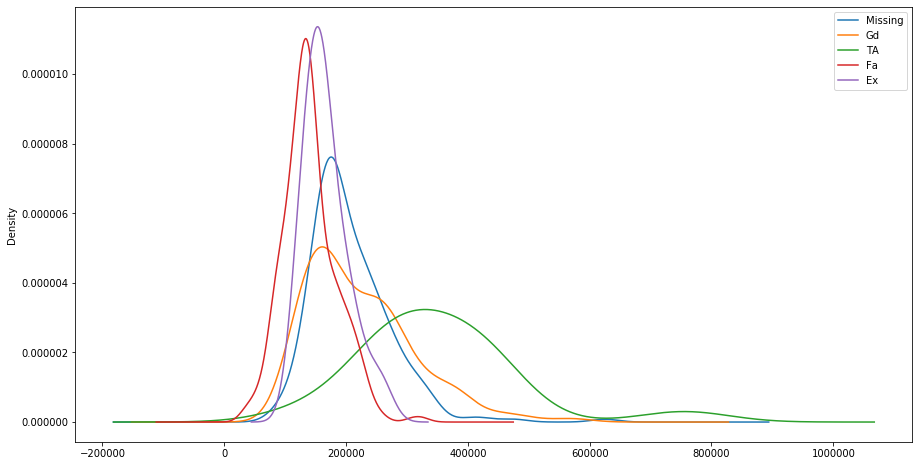

In [64]:
# let's plot the distribution of the target for the houses
# that show the different categories of the variable

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

# a plot per category
x_train[x_train['FireplaceQu']=='TA']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['FireplaceQu']=='Ex']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax)
x_train[x_train['FireplaceQu']=='Fa']['SalePrice'].plot(kind='kde', ax=ax)

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['Missing','Gd', 'TA', 'Fa', 'Ex', 'Po']
ax.legend(lines, labels, loc='best')

In [ ]:
### Generic KDE Plot for feature/target
# Works only on Categorical features

def kde_plot(df, feature, target):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    for category in df[feature].unique():
        df[df[feature]==category][target].plot(kind='kde', ax=ax)
    
    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].unique()
    ax.legend(lines, labels, loc='best')
    
    plt.show()
        